In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cols = ['age', 'employment_type', 'weighting_factor', 'education', 'schooling', 'marital_status', 'employment_area', 'partnership', 'ethnicity', 'gender', 'gains', 'losses', 'worktime', 'country', 'income']

df = pd.read_csv('einkommen.train', names=cols, sep=',', na_values='?', skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               30000 non-null  int64 
 1   employment_type   28323 non-null  object
 2   weighting_factor  30000 non-null  int64 
 3   education         30000 non-null  object
 4   schooling         30000 non-null  int64 
 5   marital_status    30000 non-null  object
 6   employment_area   28318 non-null  object
 7   partnership       30000 non-null  object
 8   ethnicity         30000 non-null  object
 9   gender            30000 non-null  object
 10  gains             30000 non-null  int64 
 11  losses            30000 non-null  int64 
 12  worktime          30000 non-null  int64 
 13  country           29461 non-null  object
 14  income            5000 non-null   object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


# Handling N/As

In [8]:
df_train = df[df["income"].notnull()]
df_pred = df[df["income"].isnull()]

print(f"Overall N/A: {1 - len(df.dropna(subset=df.columns.delete(14))) / len(df):.2f}")
print(f"Train N/A: {1 - len(df_train.dropna()) / len(df_train):.2f}")
print(f"Pred N/A: {1 - len(df_pred.dropna(subset=df_pred.columns.delete(14))) / len(df_pred):.2f}")

df = df.dropna(subset=df.columns.delete(14))

df_train = df_train.dropna()
df_pred = df_pred.dropna(subset=df_pred.columns.delete(14))

Overall N/A: 0.07
Train N/A: 0.08
Pred N/A: 0.07


# Class distribution

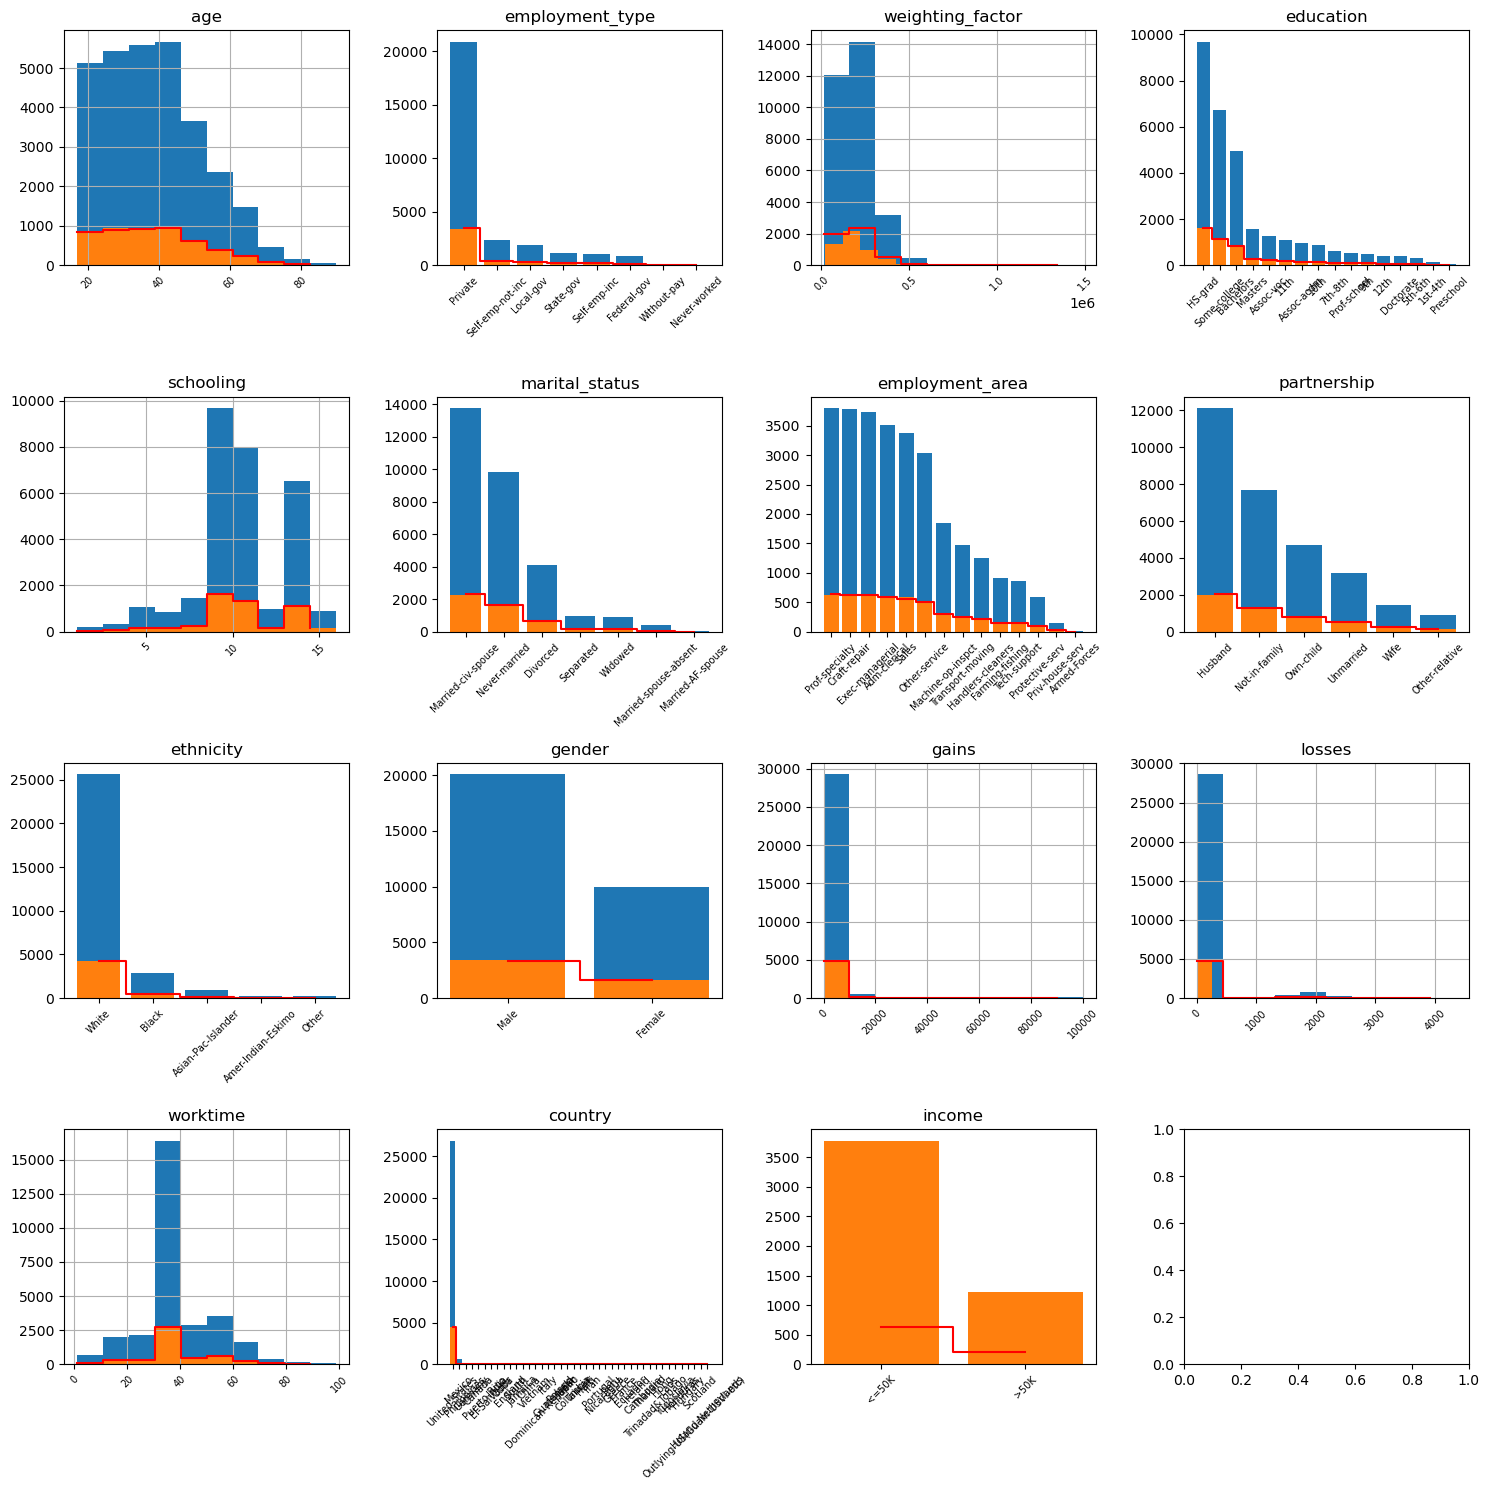

In [10]:
num_cols = ['age', 'weighting_factor', 'schooling', 'gains', 'losses', 'worktime']
cat_cols = ['employment_type', 'education', 'marital_status', 'employment_area', 'partnership', 'ethnicity', 'gender', 'country', 'income']

fig, ax = plt.subplots(4, 4, figsize=(15, 15))
for i, col in enumerate(df.columns):
    if col in num_cols:
        plt.subplot(4, 4, i + 1)
        df[col].hist(xrot=45, xlabelsize=7, bins=10)
        hist, bins = np.histogram(df[col], bins=10)
        plt.step(bins[:-1], hist/6, where='post', c="r")
        df_train[col].hist(xrot=45, xlabelsize=7, bins=10)
        plt.title(col)
    elif col in cat_cols:
        plt.subplot(4, 4, i + 1)
        plt.bar(df[col].value_counts().index, df[col].value_counts().values)
        plt.step(df[col].value_counts().index, df[col].value_counts().values/6, where='mid', c="r")
        plt.bar(df_train[col].value_counts().index, df_train[col].value_counts().values)
        plt.xticks(rotation=45, fontsize=7)
        plt.title(col)

plt.tight_layout()
plt.show()

# Write Clean Data

In [4]:
df_train.to_csv('einkommen.train.clean', index=False)
df_pred.to_csv('einkommen.pred.clean', index=False)